#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations From Sauer First Edition


## Constants definitions

In [7]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)


## Both ends fixed

In [18]:
n = 1000; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 12.0; d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Fixed right end
d0(N) = -12.0; d0(N-1) = 6.0;
dp1(N-1) = -4.0;
dp2(N-2) = 1.0;
dm1(N-1) = -6.0;
dm2(N-2) = (4/3);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =    2.8146e-04


## Left Fixed, Right Free

In [14]:
n = 1000; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 12.0; d0(2) = 6.0;
dp1(1) = -6.0;
dp2(1) = (4/3);
dm1(1) = -4.0;
dm2(1) = 1.0;

% Free right end
d0(N) = (12/25); d0(N-1) = (111/25);
dp1(N-1) = -(43/25);
dp2(N-2) = 1.0;
dm1(N-1) = -(24/25);
dm1(N-2) = (-93/25);
dm2(N-2) = (12/25);
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  0.0061607


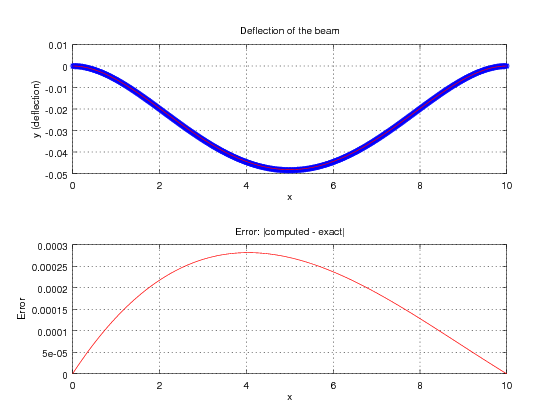

In [19]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

ErrorsBothFixed =

   0.0325841
   0.0152530
   0.0099121
   0.0073346
   0.0058190
   0.0048219
   0.0041162
   0.0035906
   0.0031839
   0.0028600



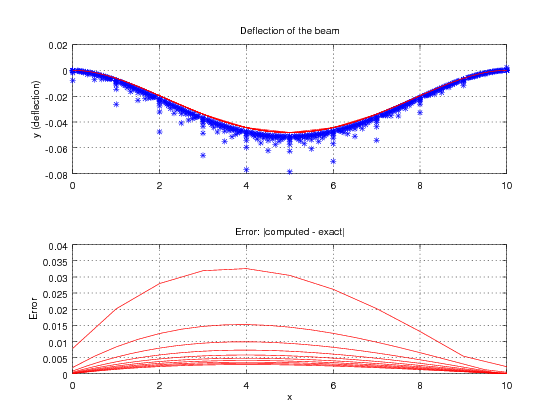

In [22]:

% vector that contains error values
ErrorsBothFixed = [];
n = 10; % number of subintervals on [0, L]
for i=1:10 
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(N) = 0;

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Fixed right end
    d0(N) = -12.0; d0(N-1) = 6.0;
    dp1(N-1) = -4.0;
    dp2(N-2) = 1.0;
    dm1(N-1) = -6.0;
    dm2(N-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots

    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrorsBothFixed(i) = max(abs(y-y_exact));
    n = n + 10;
    N = n + 1;
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    plot(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsBothFixed = ErrorsBothFixed'

In [11]:

% vector that contains error values
ErrorsLeftFixedRightFree = [];
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1;
    
    
for i=1:100 

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(N) = 0;

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, N);
    dp1 = dm1 = -4*ones(1, N-1);
    dp2 = dm2 = ones(1, N-2);
    % Fixed left end
    d0(1) = 12.0; d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    dm1(1) = -4.0;
    dm2(1) = 1.0;

    % Free right end
    d0(N) = (12/25); d0(N-1) = (111/25);
    dp1(N-1) = -(43/25);
    dp2(N-2) = 1.0;
    dm1(N-1) = -(24/25);
    dm1(N-2) = (-93/25);
    dm2(N-2) = (12/25);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots

    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrorsLeftFixedRightFree(i) = max(abs(y-y_exact));
    
    n = n + 10;
    h = L/n; % discretization spacing
    N = n + 1;  
    
endfor
ErrorsLeftFixedRightFree = ErrorsLeftFixedRightFree'

ErrorsLeftFixedRightFree =

   0.6477955
   0.3168515
   0.2093985
   0.1563248
   0.1247035
   0.1037186
   0.0887773
   0.0775979
   0.0689188
   0.0619856
   0.0563197
   0.0516028
   0.0476149
   0.0441990
   0.0412405
   0.0386531
   0.0363713
   0.0343438
   0.0325304
   0.0308989
   0.0294232
   0.0280820
   0.0268578
   0.0257359
   0.0247039
   0.0237515
   0.0228698
   0.0220512
   0.0212892
   0.0205781
   0.0199129
   0.0192894
   0.0187037
   0.0181526
   0.0176331
   0.0171425
   0.0166784
   0.0162388
   0.0158217
   0.0154255
   0.0150489
   0.0146901
   0.0143481
   0.0140215
   0.0137094
   0.0134109
   0.0131252
   0.0128514
   0.0125887
   0.0123367
   0.0120946
   0.0118619
   0.0116379
   0.0114219
   0.0112140
   0.0110135
   0.0108200
   0.0106333
   0.0104528
   0.0102783
   0.0101096
   0.0099461
   0.0097879
   0.0096348
   0.0094864
   0.0093422
   0.0092028
   0.0090672
   0.0089358
   0.0088084
   0.0086845
   0.0085639
   0.0084470
   0.0083334
   0.00822